# Introduction
---
Name : Husain Tsabit Abdur Rahim

Batch : FTDS Hacktiv8 Batch 016

Vizualization Result : [https://public.tableau.com/app/profile/husain.tsabit/viz/AustraliaAirTraffic2021/AustraliaAirTraffic2021]

# Identification of Problems
---

1.   Problem Topic
    > Australian Domestic Airline Traffic

2.   Problem Statement
  > to find out Air Traffic on Australian Domestic Airline flights in 2021

3.   Background Topic
> I created these milestones to evaluate my learning journey in the Hacktiv8 Data Science Fulltime Program, especially in Phase 0. On this occasion, I will analyze domestic flight traffic in Australia. The data I use sourced from Australian Goverment with the following link: [https://data.gov.au/dataset/ds-dga-c5029f2a-39b3-4aef-8ae1-73e7962f6170/distribution/dist-dga-677d307f-6a1f-4de4-9b85-5e1aa7074423/details?q=]

4.   problem description
- How many passengers per month in 2021?
- How many total aircraft trips per month in 2021?
- How many average of passengers load factor per month in 2021?
- what are the top 5 routes with the most passengers in 2021?
- what are the top 5 routes with the most profitable flight route during 2021?
- what are the top 5 city most visit in 2021?
- finding the central tendency of the data
- doing hypothesise testing

5.  Column Definition
*   City1 - Departures City
*   City2 - Arrivals City
*   Month - months of data
*   Passengers_Trips - number of passenger trips
*   Aircraft Trips - The number of flight stages. A return flight counts as two aircraft trips.
*   Passenger Load Factor - The total revenue passenger kilometres performed as a percentage of the total available seat kilometres.
*   Distance - Great Circle Distances between two airports.
*   Revenue Passenger Kilometres (RPKs) - Calculated by multiplying the number of revenue passengers travelling on each flight stage, by the distance in kilometres between the ports. The distances used are Great Circle Distances.
*   Available Seat Kilometres (ASKs) - Calculated by multiplying the number of seats available on each flight stage, by the distance in kilometres between the ports. The distances used are Great Circle Distances.
*   Seats - Total availability seats
*   Year - Year of the data
*   Month_num - Number of month

# Data Loading

In [55]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [56]:
#import the dataset
df = pd.read_csv("/content/dom_citypairs_web.csv")
df #overview the dataset

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num
0,ADELAIDE,ALICE SPRINGS,Jan-84,15743,143,81.8,1316,20717788,25327369,19246,1984,1
1,ADELAIDE,BRISBANE,Jan-84,3781,32,89.8,1622,6132782,6829379,4210,1984,1
2,ADELAIDE,CANBERRA,Jan-84,1339,12,94.7,972,1301508,1374348,1414,1984,1
3,ADELAIDE,DARWIN,Jan-84,3050,33,66.8,2619,7987950,11958009,4566,1984,1
4,ADELAIDE,GOLD COAST,Jan-84,1596,16,88.5,1607,2564772,2898047,1803,1984,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25885,SYDNEY,WAGGA WAGGA,Mar-22,0,0,0.0,367,0,0,0,2022,3
25886,SYDNEY,WAGGA WAGGA,Apr-22,11318,326,65.6,367,4153706,6328548,17244,2022,4
25887,SYDNEY,WAGGA WAGGA,May-22,12278,351,66.0,367,4506026,6825833,18599,2022,5
25888,SYDNEY,WAGGA WAGGA,Jun-22,12119,338,66.9,367,4447673,6648572,18116,2022,6


In [57]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25890 entries, 0 to 25889
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City1                  25890 non-null  object 
 1   City2                  25890 non-null  object 
 2   Month                  25890 non-null  object 
 3   Passenger_Trips        25890 non-null  int64  
 4   Aircraft_Trips         25890 non-null  int64  
 5   Passenger_Load_Factor  25890 non-null  float64
 6   Distance_GC_(km)       25890 non-null  int64  
 7   RPKs                   25890 non-null  int64  
 8   ASKs                   25890 non-null  int64  
 9   Seats                  25890 non-null  int64  
 10  Year                   25890 non-null  int64  
 11  Month_num              25890 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 2.4+ MB


In [58]:
#create the new dataset with focus in 2021
df_2021 = df[(df.Year == 2021)]

#overview the dataset
df_2021

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num
19167,ALBURY,SYDNEY,Jan-21,0,0,0.0,452,0,0,0,2021,1
19168,ALBURY,SYDNEY,Feb-21,0,0,0.0,452,0,0,0,2021,2
19169,ALBURY,SYDNEY,Mar-21,9871,291,58.2,452,4461692,7672248,16974,2021,3
19170,ALBURY,SYDNEY,Apr-21,10648,315,55.1,452,4812896,8728120,19310,2021,4
19171,ALBURY,SYDNEY,May-21,11507,322,58.9,452,5201164,8832080,19540,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...
25878,SYDNEY,WAGGA WAGGA,Aug-21,0,0,0.0,367,0,0,0,2021,8
25879,SYDNEY,WAGGA WAGGA,Sep-21,0,0,0.0,367,0,0,0,2021,9
25880,SYDNEY,WAGGA WAGGA,Oct-21,0,0,0.0,367,0,0,0,2021,10
25881,SYDNEY,WAGGA WAGGA,Nov-21,0,0,0.0,367,0,0,0,2021,11


# Data Cleaning

In [59]:
# to know the sum of missing values
df_2021.isnull().sum()

City1                    0
City2                    0
Month                    0
Passenger_Trips          0
Aircraft_Trips           0
Passenger_Load_Factor    0
Distance_GC_(km)         0
RPKs                     0
ASKs                     0
Seats                    0
Year                     0
Month_num                0
dtype: int64

In [60]:
#rename column 'City1' and 'City2'
df_2021 = df_2021.rename(columns={'City1':'Origin', 'City2':'Destination'})
df_2021

,Origin,Destination,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num
19167,ALBURY,SYDNEY,Jan-21,0,0,0.0,452,0,0,0,2021,1
19168,ALBURY,SYDNEY,Feb-21,0,0,0.0,452,0,0,0,2021,2
19169,ALBURY,SYDNEY,Mar-21,9871,291,58.2,452,4461692,7672248,16974,2021,3
19170,ALBURY,SYDNEY,Apr-21,10648,315,55.1,452,4812896,8728120,19310,2021,4
19171,ALBURY,SYDNEY,May-21,11507,322,58.9,452,5201164,8832080,19540,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...
25878,SYDNEY,WAGGA WAGGA,Aug-21,0,0,0.0,367,0,0,0,2021,8
25879,SYDNEY,WAGGA WAGGA,Sep-21,0,0,0.0,367,0,0,0,2021,9
25880,SYDNEY,WAGGA WAGGA,Oct-21,0,0,0.0,367,0,0,0,2021,10
25881,SYDNEY,WAGGA WAGGA,Nov-21,0,0,0.0,367,0,0,0,2021,11


In [61]:
df_2021

,Origin,Destination,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num
19167,ALBURY,SYDNEY,Jan-21,0,0,0.0,452,0,0,0,2021,1
19168,ALBURY,SYDNEY,Feb-21,0,0,0.0,452,0,0,0,2021,2
19169,ALBURY,SYDNEY,Mar-21,9871,291,58.2,452,4461692,7672248,16974,2021,3
19170,ALBURY,SYDNEY,Apr-21,10648,315,55.1,452,4812896,8728120,19310,2021,4
19171,ALBURY,SYDNEY,May-21,11507,322,58.9,452,5201164,8832080,19540,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...
25878,SYDNEY,WAGGA WAGGA,Aug-21,0,0,0.0,367,0,0,0,2021,8
25879,SYDNEY,WAGGA WAGGA,Sep-21,0,0,0.0,367,0,0,0,2021,9
25880,SYDNEY,WAGGA WAGGA,Oct-21,0,0,0.0,367,0,0,0,2021,10
25881,SYDNEY,WAGGA WAGGA,Nov-21,0,0,0.0,367,0,0,0,2021,11


In [62]:
#create new column for route (combination of Origin and Destination)
df_2021['Route'] = df_2021['Origin'].str.cat(df_2021['Destination'], sep= ' - ')
df_2021


,Origin,Destination,Month,Passenger_Trips,Aircraft_Trips,Passenger_Load_Factor,Distance_GC_(km),RPKs,ASKs,Seats,Year,Month_num,Route
19167,ALBURY,SYDNEY,Jan-21,0,0,0.0,452,0,0,0,2021,1,ALBURY - SYDNEY
19168,ALBURY,SYDNEY,Feb-21,0,0,0.0,452,0,0,0,2021,2,ALBURY - SYDNEY
19169,ALBURY,SYDNEY,Mar-21,9871,291,58.2,452,4461692,7672248,16974,2021,3,ALBURY - SYDNEY
19170,ALBURY,SYDNEY,Apr-21,10648,315,55.1,452,4812896,8728120,19310,2021,4,ALBURY - SYDNEY
19171,ALBURY,SYDNEY,May-21,11507,322,58.9,452,5201164,8832080,19540,2021,5,ALBURY - SYDNEY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25878,SYDNEY,WAGGA WAGGA,Aug-21,0,0,0.0,367,0,0,0,2021,8,SYDNEY - WAGGA WAGGA
25879,SYDNEY,WAGGA WAGGA,Sep-21,0,0,0.0,367,0,0,0,2021,9,SYDNEY - WAGGA WAGGA
25880,SYDNEY,WAGGA WAGGA,Oct-21,0,0,0.0,367,0,0,0,2021,10,SYDNEY - WAGGA WAGGA
25881,SYDNEY,WAGGA WAGGA,Nov-21,0,0,0.0,367,0,0,0,2021,11,SYDNEY - WAGGA WAGGA


In [63]:
#delete useless column
#df_2021.drop(columns=['Distance_GC_(km)', 'ASKs', 'Seats', 'Year', 'Month_num'])


# Exploratory Data Analysis 

In [64]:
#finding the total passenger per month in 2021
total_pax = df_2021.groupby(['Month_num']).sum()['Passenger_Trips']
total_pax = pd.DataFrame(total_pax.sort_values(ascending = False))
total_pax

,Passenger_Trips
Month_num,
4,3048158
5,2880247
3,2381337
12,2167260
6,1881047
2,1283787
1,1262713
11,1185021
7,1006566


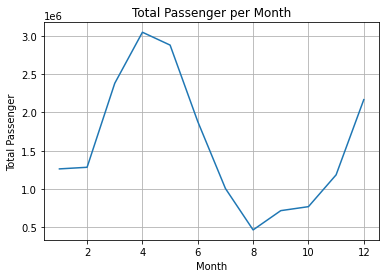

In [65]:
plt.plot(df_2021.groupby(['Month_num']).sum()['Passenger_Trips']) #Putting the position of the point on x and y
plt.xlabel('Month') 
plt.ylabel('Total Passenger')
plt.title('Total Passenger per Month') #add tittle
plt.grid(True) #Display grid lines

plt.show()

Based on the data above we can see a graph of each month, where the highest number of total passengers per month in 2021 is in the April.

In [66]:
#finding the total revenue per month in 2021
total_trip = df_2021.groupby(['Month_num']).sum()['Aircraft_Trips']
total_trip = pd.DataFrame(total_trip.sort_values(ascending = False))
total_trip

,Aircraft_Trips
Month_num,
5,29273
4,28918
12,25897
3,24068
6,22098
2,14548
11,14500
1,14095
7,13868


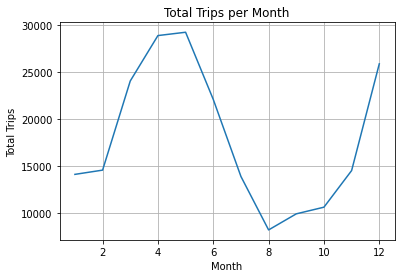

In [67]:
plt.plot(df_2021.groupby(['Month_num']).sum()['Aircraft_Trips']) #Putting the position of the point on x and y
plt.xlabel('Month') 
plt.ylabel('Total Trips')
plt.title('Total Trips per Month') #add tittle
plt.grid(True) #Display grid lines

plt.show()

Based on the data above we can see a graph of each month, where the highest number of total trips per monthin 2021 is in the Mei.

In [68]:
#finding the total revenue per month in 2021
total_plf = df_2021.groupby(['Month_num']).mean()['Passenger_Load_Factor']
total_plf = pd.DataFrame(total_plf.sort_values(ascending = False))
total_plf

,Passenger_Load_Factor
Month_num,
4,52.282192
5,50.615068
3,48.412500
6,42.090909
12,39.606494
2,38.474648
1,32.773239
11,30.507792
7,27.846753


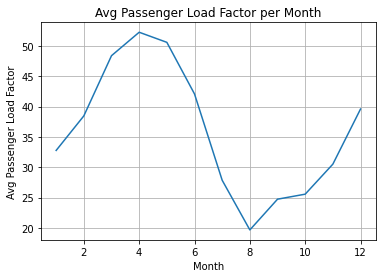

In [69]:
plt.plot(df_2021.groupby(['Month_num']).mean()['Passenger_Load_Factor']) #Putting the position of the point on x and y
plt.xlabel('Month') 
plt.ylabel('Avg Passenger Load Factor')
plt.title('Avg Passenger Load Factor per Month') #add tittle
plt.grid(True) #Display grid lines

plt.show()

Based on the data above we can see a graph of each month, where the average passengers load factor per month in 2021 is in the April.

In [70]:
#finding the route with the most visit city
visit_city = df_2021.groupby(['Destination']).sum()['Passenger_Trips']
visit_city = pd.DataFrame(visit_city.sort_values(ascending = False))[0:5]
visit_city

,Passenger_Trips
Destination,
SYDNEY,6518048
MELBOURNE,3096024
PERTH,2057324
CAIRNS,1062146
GOLD COAST,989298


According to the data above we can see the most favourite city by total passanger, where the most favourite city is Sydney.

In [71]:
#finding the route with the most passenger trips
route_pax = df_2021.groupby(['Route']).sum()['Passenger_Trips']
route_pax = pd.DataFrame(route_pax.sort_values(ascending = False))[0:5]
route_pax

,Passenger_Trips
Route,
MELBOURNE - SYDNEY,2119779
BRISBANE - SYDNEY,1093231
BRISBANE - CAIRNS,1012528
MELBOURNE - GOLD COAST,787571
BRISBANE - MELBOURNE,787439


According to the data above we can see the result of route with the most total passanger, where the flight route with the highest number is from Melbourne to Sydney.

In [72]:
#finding the route with the most revenues
route_rev = df_2021.groupby(['Route']).sum()['RPKs']
route_rev = pd.DataFrame(route_rev.sort_values(ascending = False))[0:5]
route_rev

,RPKs
Route,
MELBOURNE - SYDNEY,1503292965
BRISBANE - CAIRNS,1408486261
BRISBANE - MELBOURNE,1087453259
MELBOURNE - GOLD COAST,1049599659
BRISBANE - PERTH,1038090630


According to the data above we can see the result of The flight route with the highest number of benefits is from Melbourne to Sydney.

# Measures of Central Tendency

## Central Tendency of Pax Load Factors in 2021


In [73]:
print(df_2021['Passenger_Load_Factor'].mean())
print(df_2021['Passenger_Load_Factor'].median())

35.84416017797553
46.8


as you can see, the mean of passenger load factor in 2021 is 35.84 and the median of passenger load factor in 2021 is 46.8

## Central Tendency of total Passenger Trips in 2021

In [74]:
print(df_2021['Passenger_Trips'].mean())
print(df_2021['Passenger_Trips'].median())

21188.090100111236
9846.0


as you can see, according to the data above the mean of total passenger trips in 2021 is 21188.09 and the median of total passenger trips in 2021 is 9846

## Central Tendency of Revenue per Kilometres (RPKs) in 2021

In [75]:
print(df_2021['RPKs'].mean())
print(df_2021['RPKs'].median())


24703657.60066741
7306417.0


as you can see, according to the data above the mean of Revenue per Kilometres in 2021 is 24703657.60 and the median of Revenue per kilometres in 2021 is 7306417

# Hypothesis testing

In this opportunities I want to check, whether average of total passangger in 2021 vs 2020 are significantly different or not using one sample two tailed test. Our hypothesis on this case:

**H0: μ tahun 2021 = μ tahun 2020**

**H1: μ tahun 2021 != μ tahun 2020**

In [76]:
avg_pax_2021 = df_2021['Passenger_Trips'].mean()
avg_pax_2020 = df[(df.Year == 2020)].mean()['Passenger_Trips']

print('Average total passengger in 2021 is : {}'.format(np.round(avg_pax_2021))) #print avg total pax 2021
print('Average total passengger in 2020 is : {}'.format(np.round(avg_pax_2020))) #print avg total pax 2020

Average total passengger in 2021 is : 21188.0
Average total passengger in 2020 is : 19126.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [77]:
t_stat,p_val = stats.ttest_1samp(df_2021.Passenger_Trips,19126.0)
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 0.11708106763119622
t-statistics: 1.5686531171744449


Since our p-value is more than `0.05`, so we fail to reject the null hypothesis and we can conclude that, our passangers trip in 2021 is significantly different to passengers trip in 2020


In [78]:
#export dataframe to csv for visualization with tableu
df_2021.to_csv('df_2021_milestone.csv')

# Overall Analysis 

According to the data above, the conclusions that can be drawn based on the results of the data processing above are:
1. the highest number of passengers in 2021 was in April, with the number of passengers as much as 3048158
2. The highest number of aircraft flights in 2021 was in May, with a total of 29273 flights
3. The highest average number of passenger load factors in 2021 occurred in April, with an average number of 52.28
4. Sydney is the favorite destination for passengers, followed by Melbourne in second place
5. the route from Melbourne to Sydney will be the route with the highest number of passengers and the route that will get the most benefits during 2021

So, if your company want to expand new route on Australia domestic flight, I suggest you to open the route for destination city is Sydney or Melbourne, because the two cities is the most favorite destination in 2021.